In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns

In [3]:
data = pd.read_excel('Book1.xlsx')
data.drop('Name',axis=1,inplace=True)
data.drop('Cabin',axis=1,inplace=True)
data.drop('Ticket',axis=1,inplace=True)
data.drop('PassengerId',axis=1,inplace=True)

In [16]:
data.head()
sex = pd.get_dummies(data['Sex'],drop_first=True)
embarked = pd.get_dummies(data['Embarked'],drop_first=True)
pclass = pd.get_dummies(data['Pclass'],drop_first=True)

In [28]:
new_data.dropna(inplace=True)

In [344]:
#Support vector machine
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

x = new_data[['Age','Fare']]
y = new_data['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

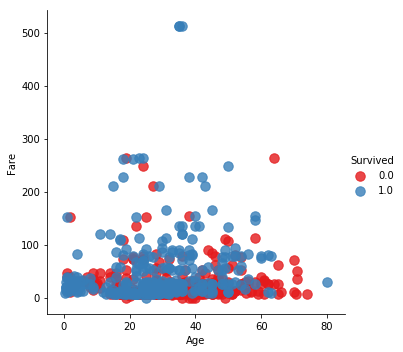

In [345]:
sns.lmplot('Age','Fare',data=new_data,hue='Survived',palette='Set1',fit_reg=False,scatter_kws={'s':90})

In [563]:

model = svm.SVC(kernel='rbf',gamma=0.001,C=100,coef0=0.01,probability=True)
model.fit(x_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.01,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

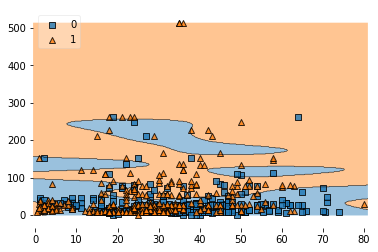

In [564]:
x_arr = x.values
y_arr = y.values

plot_decision_regions(X=x_arr,y=y_arr.astype(int),clf = model,legend=2)

In [565]:
pre = model.predict(x_test)
accuracy_score(y_test.astype(int),pre)*100

67.90697674418604

In [427]:
#Tree algorithm
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=2,max_leaf_nodes=4,min_samples_leaf=2,)

In [428]:

tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = 'vinay.png'
features_names = new_data.columns[0:8]
target_name = y_train.unique().tolist()
out = tree.export_graphviz(tree,feature_names=features_names, out_file = dot_data, class_names=str(y_train.unique()),filled=True,special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img,interpolation='nearest')

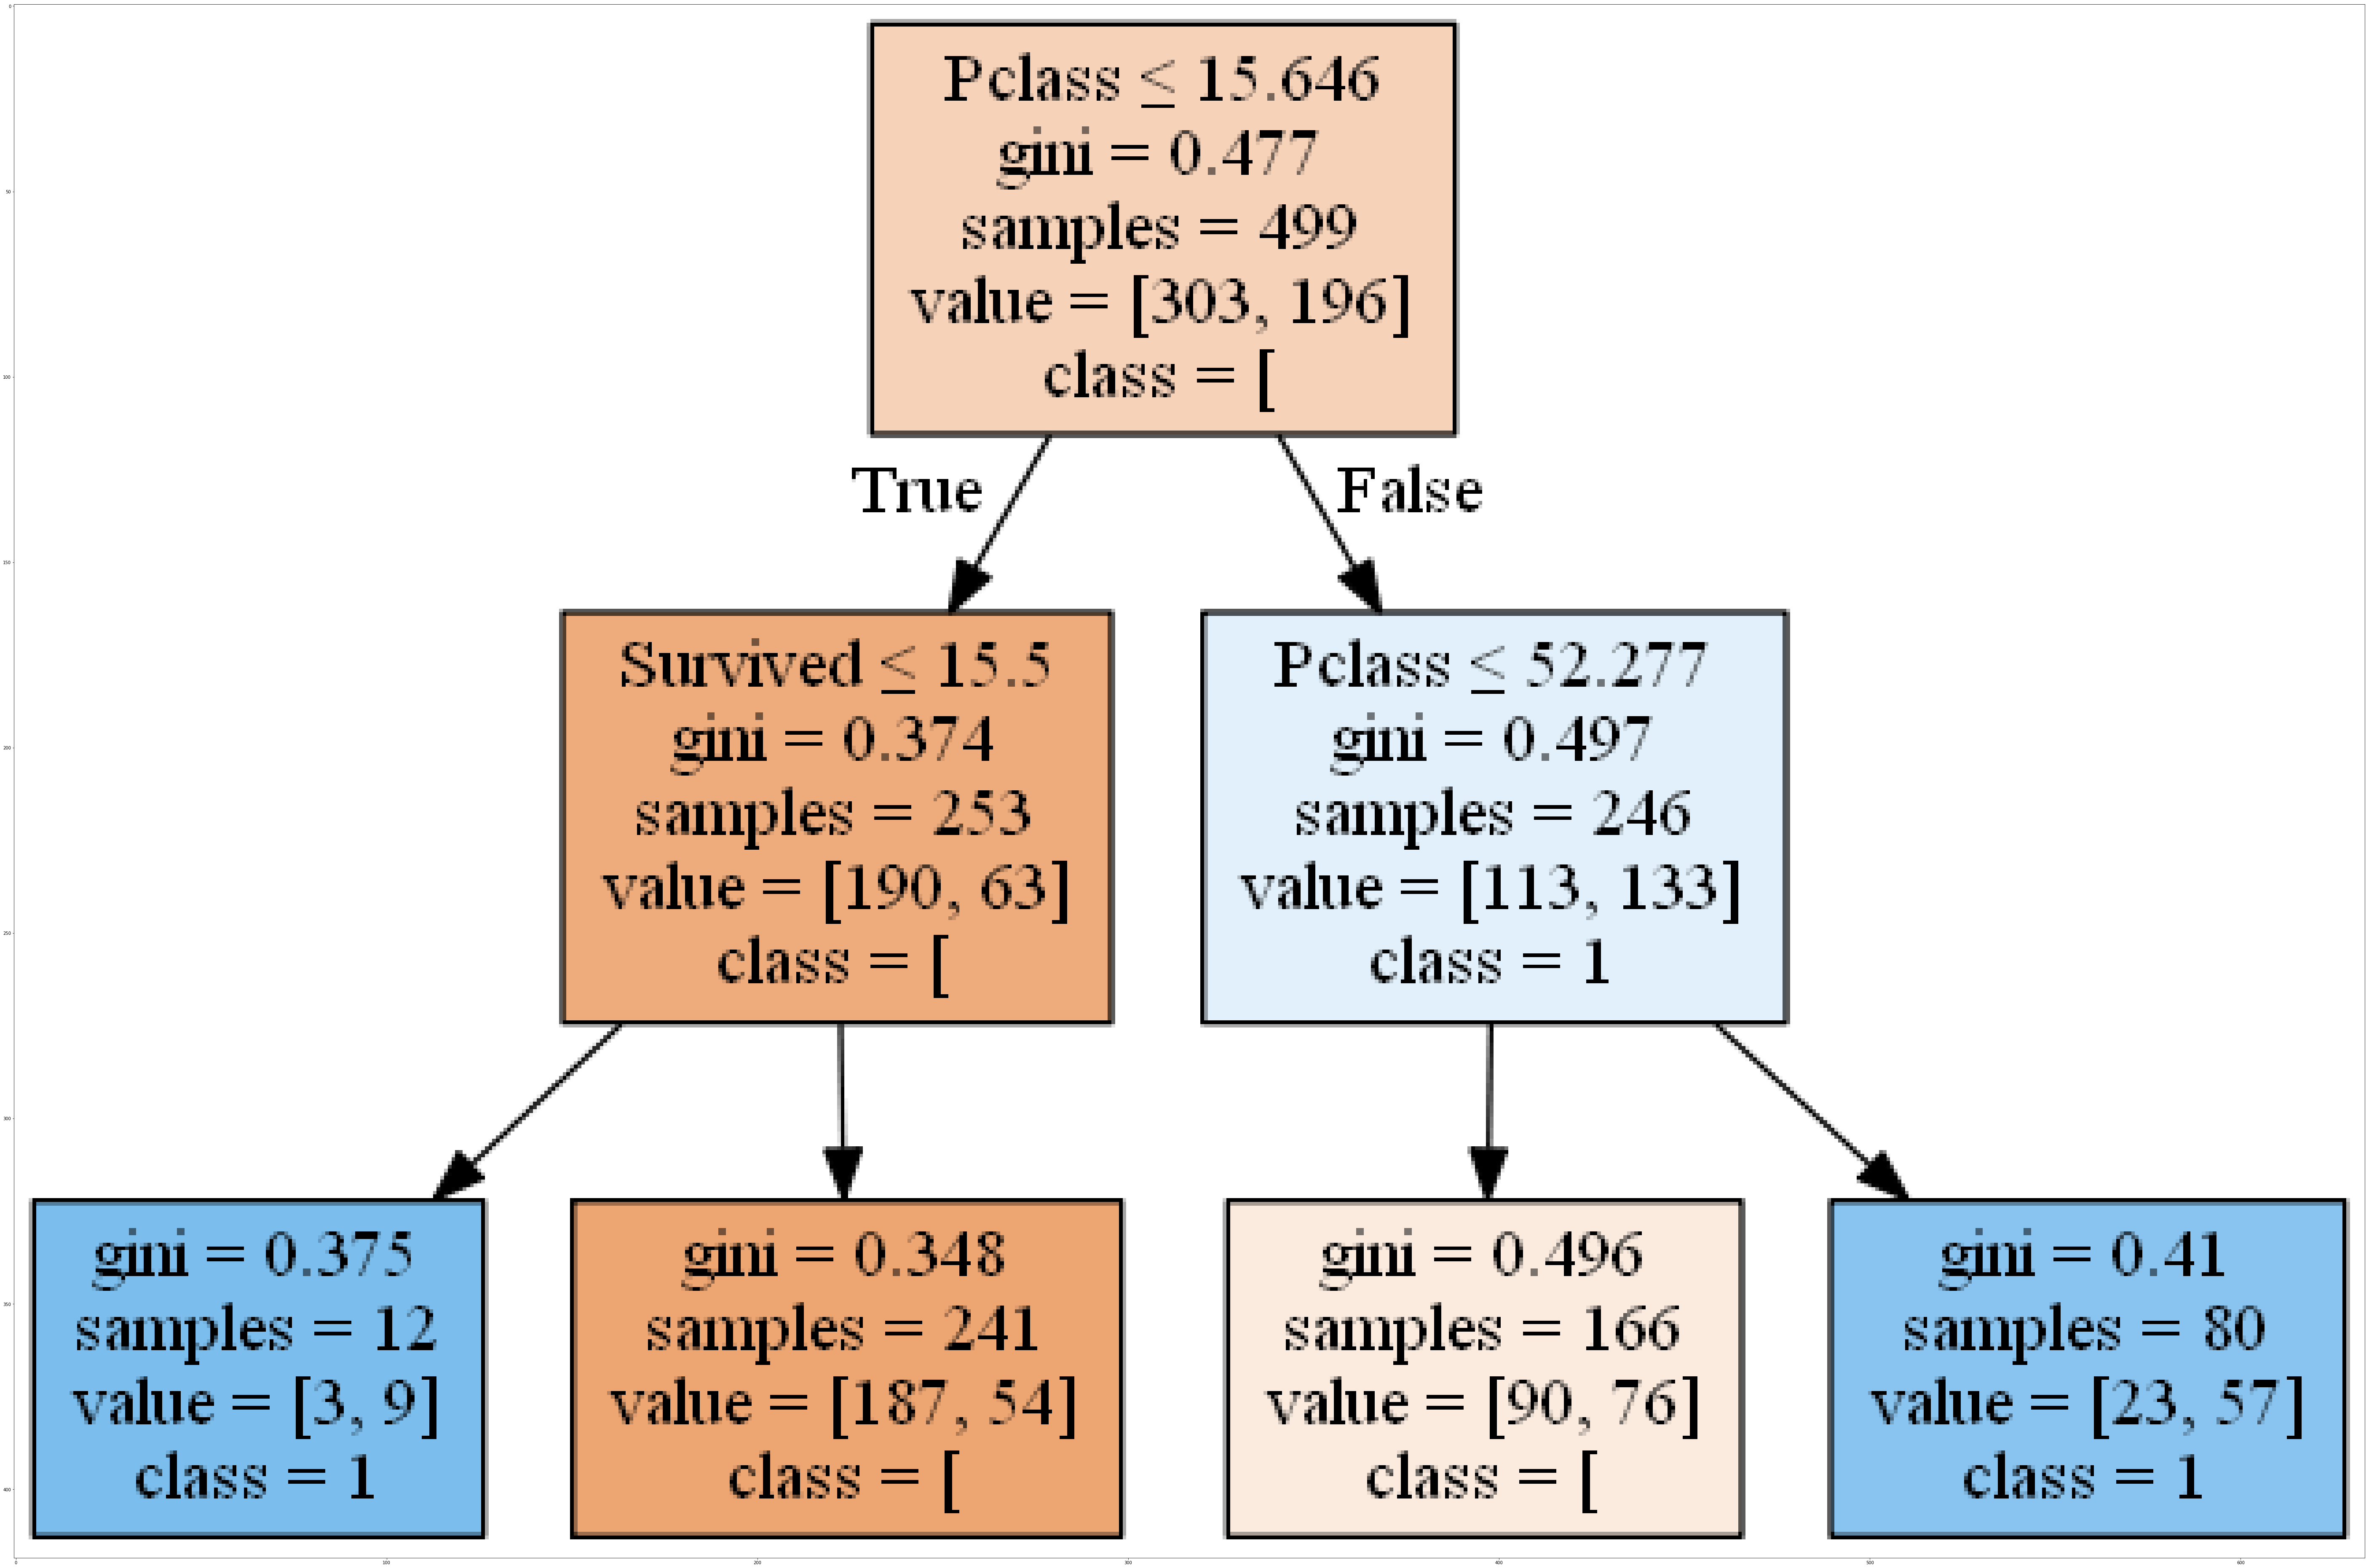

In [410]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = 'vinay.png'
features_names = new_data.columns[0:2]
target_name = y_train.unique().tolist()
out = tree.export_graphviz(tree_model,feature_names=features_names, out_file = dot_data, class_names=str(y_train.unique()),filled=True,special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img,interpolation='nearest')

In [429]:
pred = tree_model.predict(x_test)
accuracy_score(y_test,pred)*100

71.62790697674419

In [445]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs',C=0.1)
logistic.fit(x_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

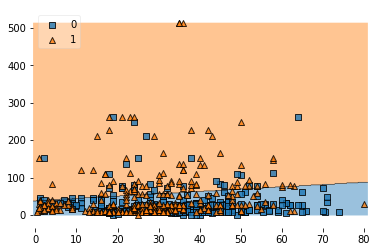

In [446]:
plot_decision_regions(X=x_arr,y=y_arr.astype(int),clf = logistic,legend=2)

In [447]:
predi = logistic.predict(x_test)
accuracy_score(y_test,predi)*100

67.90697674418604

In [557]:
#Ensemble random forest classifier

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

random_forest = RandomForestClassifier(criterion='entropy',n_estimators=10)
random_forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [558]:
pred_forest = random_forest.predict(x_test)
accuracy_score(y_test,pred_forest)*100

66.04651162790698

In [477]:
logistic.score(x_train,y_train)*100

65.33066132264528

In [478]:
tree_model.score(x_train,y_train)*100

69.53907815631263

In [479]:
model.score(x_train,y_train)*100

71.7434869739479

In [492]:
random_forest.score(x_train,y_train)*100

69.53907815631263

In [574]:
bg = BaggingClassifier(DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=4,max_depth=2,min_samples_leaf=2),max_samples=0.3,max_features=1.0,n_jobs=-1,oob_score=True,n_estimators=10)
bg.fit(x_train,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.3, n_estimators=10, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [575]:
bg.score(x_test,y_test)*100

70.23255813953489

In [576]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('lr',logistic),('rf',random_forest),('svc',model),('tr',tree_model)],voting='hard')
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomF...it=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [577]:
predic = voting.predict(x_test)
accuracy_score(y_test,predi)*100

67.90697674418604